<a href="https://colab.research.google.com/github/teethavattcp/teethavat_data_sci_port/blob/main/Projects/01_PM_2.5_Forecasting_with_LSTM_RNN/PM2.5_Forecasting_BKK_02_Naive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Naive forecasting model

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns;
import math

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from keras import optimizers
from keras.models import Sequential

from keras.layers import LSTM
from keras.layers.core import Dense, Dropout, Activation

from keras.callbacks import ModelCheckpoint

In [ ]:
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Join dataframe

In [ ]:
df_train_pm25 = pd.read_csv('/content/drive/MyDrive/DATA_SCI_SKILL/DATA SCI ENG/Final_Proj_1/train_pm25_BKK.csv',sep=',')

In [ ]:
df_test_pm25 = pd.read_csv('/content/drive/MyDrive/DATA_SCI_SKILL/DATA SCI ENG/Final_Proj_1/test_pm25_BKK.csv',sep=',')

## Manage Training dataset

In [ ]:
df_train_pm25

,Time,PM2.5(µg/m3)
0,2017-07-01 01:00:00,10.0
1,2017-07-01 04:00:00,15.0
2,2017-07-01 07:00:00,23.0
3,2017-07-01 10:00:00,22.0
4,2017-07-01 13:00:00,14.0
...,...,...
8763,2020-06-30 10:00:00,14.0
8764,2020-06-30 13:00:00,12.0
8765,2020-06-30 16:00:00,9.0
8766,2020-06-30 19:00:00,15.0


In [ ]:
df_train = df_train_pm25[['Time','PM2.5(µg/m3)']]

df_train['Time'] = pd.to_datetime(df_train['Time'])
df_train = df_train.set_index('Time')

df_train

,PM2.5(µg/m3)
Time,
2017-07-01 01:00:00,10.0
2017-07-01 04:00:00,15.0
2017-07-01 07:00:00,23.0
2017-07-01 10:00:00,22.0
2017-07-01 13:00:00,14.0
...,...
2020-06-30 10:00:00,14.0
2020-06-30 13:00:00,12.0
2020-06-30 16:00:00,9.0


In [ ]:
df_train.isnull().sum()

PM2.5(µg/m3)    0
dtype: int64

## Manage Testing Dataset

In [ ]:
df_test_pm25

,Time,PM2.5(µg/m3)
0,2020-07-01 01:00:00,8.0
1,2020-07-01 04:00:00,8.0
2,2020-07-01 07:00:00,13.0
3,2020-07-01 10:00:00,10.0
4,2020-07-01 13:00:00,15.0
...,...,...
2923,2021-07-01 10:00:00,14.0
2924,2021-07-01 13:00:00,14.0
2925,2021-07-01 16:00:00,14.0
2926,2021-07-01 19:00:00,13.0


In [ ]:
df_test_pm25.isnull().sum()

Time            0
PM2.5(µg/m3)    0
dtype: int64

In [ ]:
df_test = df_test_pm25.copy()
df_test['Time'] = pd.to_datetime(df_test['Time'])
df_test = df_test.set_index('Time')
df_test

,PM2.5(µg/m3)
Time,
2020-07-01 01:00:00,8.0
2020-07-01 04:00:00,8.0
2020-07-01 07:00:00,13.0
2020-07-01 10:00:00,10.0
2020-07-01 13:00:00,15.0
...,...
2021-07-01 10:00:00,14.0
2021-07-01 13:00:00,14.0
2021-07-01 16:00:00,14.0


In [ ]:
df_test.isnull().sum()

PM2.5(µg/m3)    0
dtype: int64

# Explore Data Analysis

In [ ]:
df_all = pd.concat([df_train,df_test])
df_all

,PM2.5(µg/m3)
Time,
2017-07-01 01:00:00,10.0
2017-07-01 04:00:00,15.0
2017-07-01 07:00:00,23.0
2017-07-01 10:00:00,22.0
2017-07-01 13:00:00,14.0
...,...
2021-07-01 10:00:00,14.0
2021-07-01 13:00:00,14.0
2021-07-01 16:00:00,14.0


Text(0.5, 1.0, 'PM 2.5 during 2017 to 2021')

<Figure size 800x400 with 0 Axes>

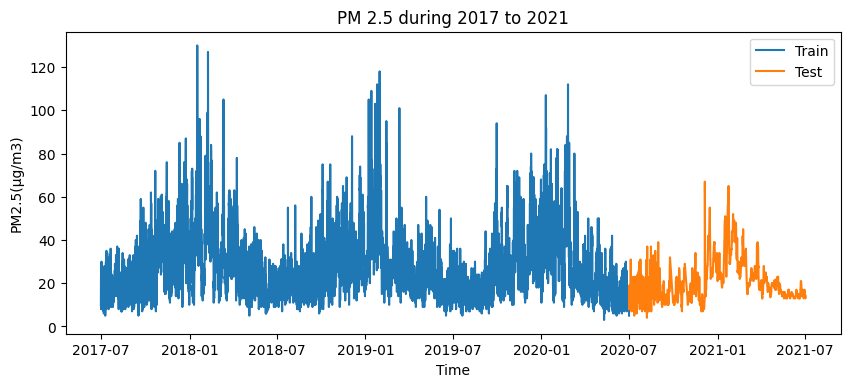

In [ ]:
fig = plt.figure(figsize=(8,4),dpi = 100)
fig,axis = plt.subplots(figsize = (10,4),dpi = 100)

axis.plot(df_train.index,df_train['PM2.5(µg/m3)'],label = 'Train')
axis.plot(df_test.index,df_test['PM2.5(µg/m3)'],label = 'Test')
axis.legend(loc = 'best')
axis.set_xlabel('Time')
axis.set_ylabel('PM2.5(µg/m3)')
axis.set_title('PM 2.5 during 2017 to 2021')

There is seasonal effect during Jan-Feb

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

Figure(432x288)


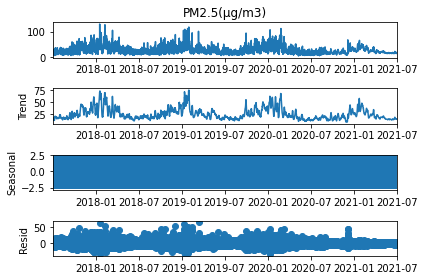

In [ ]:
result = seasonal_decompose(df_all['PM2.5(µg/m3)'])
print(result.plot())


Data were likely seasonal but not stationary ---> RNN will be used to learn complex pattern

# Prepare data

## Split validate set

Ratio:

Learn = 8768 (75%) ---> Train = 50%, validate = 25% (1/3 of learn set)

Test = 2928 (25%)

In [ ]:
#yyyy_mm_dd = list(df_train.index.strftime("%Y-%m-%d").drop_duplicates())
#len(yyyy_mm_dd)

In [ ]:
#2/3*1096

In [ ]:
#yyyy_mm_dd[0],yyyy_mm_dd[730],yyyy_mm_dd[1095]

In [ ]:
#df_training = df_train[df_train.index < '2019-07-01 01:00:00'].copy()
#df_val = df_train[df_train.index >= '2019-07-01 01:00:00'].copy()

In [ ]:
def prep_to_np(dftrain, dftest):
    train_data = dftrain.to_numpy()
    test_data = dftest.to_numpy()
    
    x_train = train_data[:,1:] 
    y_train = train_data[:,0]

    x_test = test_data[:,1:] 
    y_test = test_data[:,0]
    
    return [x_train,y_train,x_test,y_test]

In [ ]:
x_train,y_train,x_test,y_test = prep_to_np(df_train, df_test)

# Build Forecasting model using Naive Approach

In [ ]:
pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.0 MB 2.1 MB/s 


In [ ]:
from sktime.forecasting.naive import NaiveForecaster

https://www.sktime.org/en/stable/api_reference/auto_generated/sktime.forecasting.naive.NaiveForecaster.html

## Hyperparameter tuning

In [ ]:
#from sktime.forecasting.model_selection import (
    #ExpandingWindowSplitter,
    #ForecastingGridSearchCV,
    #ExpandingWindowSplitter)

In [ ]:
#from sktime.performance_metrics.forecasting import     mean_absolute_percentage_error

In [ ]:
#fh = np.arange(len(y_test)) +1
#cv = ExpandingWindowSplitter(
    #initial_window=24,
    #step_length=12,
    #start_with_window=True,
    #fh=[1,2,3])
#param_grid = {"strategy" : ["last", "mean", "drift"],
 #             "sp" : [1,8,365,2920]
  #            }
#gscv = ForecastingGridSearchCV(
 #   forecaster= NaiveForecaster(),
  #  param_grid=param_grid,
   # cv=cv,
    #n_jobs = -1)
#gscv.fit(y_train)

ForecastingGridSearchCV(cv=ExpandingWindowSplitter(fh=[1, 2, 3],
                                                   initial_window=24,
                                                   step_length=12),
                        forecaster=NaiveForecaster(), n_jobs=-1,
                        param_grid={'sp': [1, 8, 365, 2920],
                                    'strategy': ['last', 'mean', 'drift']})

In [ ]:
#y_pred = gscv.predict(fh)

## Forecast data

forecaster = NaiveForecaster(strategy="mean",sp=8*365) #mape= 51%

forecaster = NaiveForecaster(strategy="mean",sp=2928) #mape= 50%

In [ ]:
forecaster = NaiveForecaster(strategy="mean",sp=2928)
forecaster.fit(y_train)

NaiveForecaster(sp=2928, strategy='mean')

In [ ]:
#forecasting horizon
fh = np.arange(len(y_test)) +1
fh

array([   1,    2,    3, ..., 2926, 2927, 2928])

In [ ]:
y_pred = forecaster.predict(fh)

In [ ]:
y_pred

array([[15.        ],
       [14.5       ],
       [18.        ],
       ...,
       [18.33333333],
       [19.        ],
       [10.66666667]])

In [ ]:
df_test_ = df_test['PM2.5(µg/m3)'].copy()
df_test_['Predicted PM2.5'] = pd.DataFrame(y_pred)
df_test_['Predicted PM2.5']

,0
0,15.000000
1,14.500000
2,18.000000
3,14.000000
4,13.500000
...,...
2923,13.666667
2924,15.666667
2925,18.333333
2926,19.000000


In [ ]:
y_test.shape

(2928,)

In [ ]:
y_pred.shape

(2928, 1)

In [ ]:
import math
from sklearn.metrics import mean_squared_error

def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

print( 'MAPE =', MAPE(y_test, y_pred[:,0]) )
print( 'RMSE =', math.sqrt(mean_squared_error(y_test, y_pred[:,0])) )

MAPE = 50.04305438672956
RMSE = 11.383686439518364


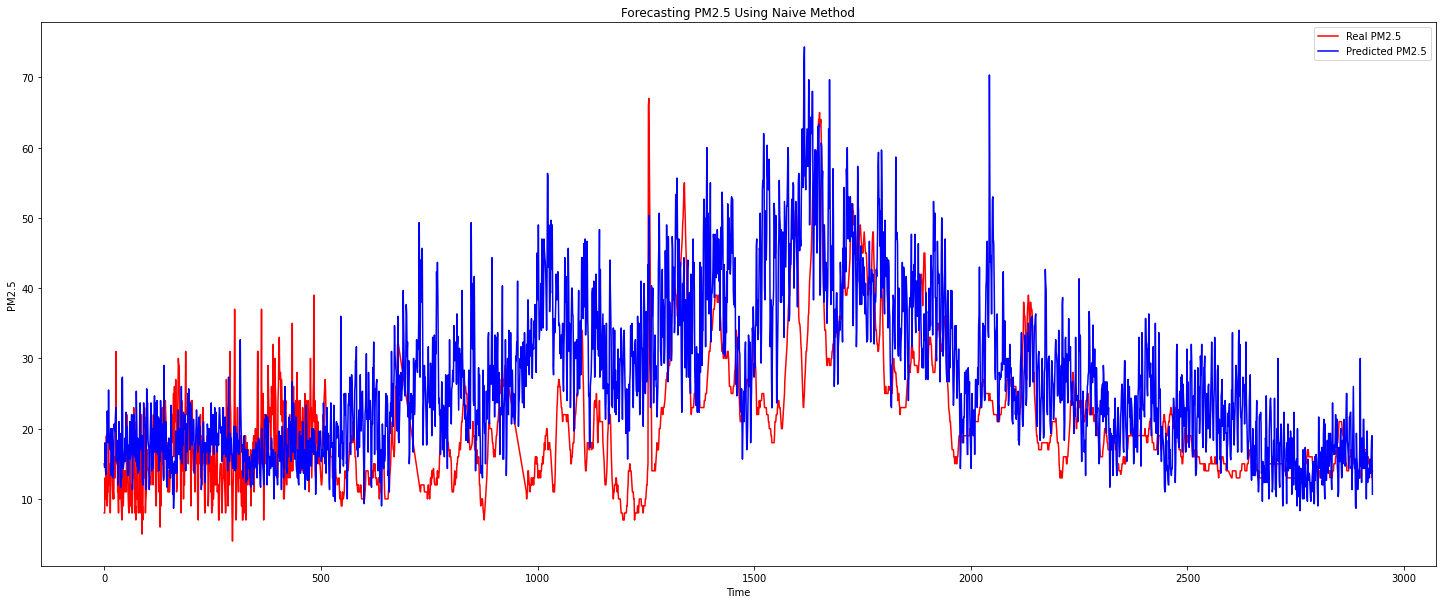

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(y_test, color = 'red', label = 'Real PM2.5')
plt.plot(y_pred[:,0], color = 'blue', label = 'Predicted PM2.5')
plt.title('Forecasting PM2.5 Using Naive Method')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()